# Behaviors  EDA

In [1]:
pip install koreanize_matplot

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement koreanize_matplot (from versions: none)
ERROR: No matching distribution found for koreanize_matplot
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib 

# Behaviors

In [3]:
behaviors_df = pd.read_csv('./Data/behaviors.csv')  
behaviors_df.head()

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [4]:
behaviors_df.shape

(156965, 5)

In [5]:
behaviors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   impression_id  156965 non-null  int64 
 1   user_id        156965 non-null  object
 2   time           156965 non-null  object
 3   history        153727 non-null  object
 4   impressions    156965 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


In [6]:
behaviors_df.isna().sum()

impression_id       0
user_id             0
time                0
history          3238
impressions         0
dtype: int64

In [7]:
behaviors_df.dropna(axis=0,inplace=True)

In [8]:
behaviors_df.shape

(153727, 5)

In [9]:
behaviors_df['time'].dtypes

dtype('O')

In [10]:
# 날짜 데이터 타입 변경
behaviors_df['time'] = pd.to_datetime(behaviors_df['time'])


In [11]:
behaviors_df['time'].head()

0   2019-11-11 09:05:58
1   2019-11-12 18:11:30
2   2019-11-14 07:01:48
3   2019-11-11 05:28:05
4   2019-11-12 16:11:21
Name: time, dtype: datetime64[ns]

In [12]:
# 요일 (월=0~ 일=6)
behaviors_df['weekday'] = behaviors_df['time'].dt.weekday

# 시간대 (0~23시)
behaviors_df['hour'] = behaviors_df['time'].dt.hour

# 오전/오후 구분(0: 오전,1: 오후)
behaviors_df['is_afternoon'] = behaviors_df['time'].dt.hour >= 12

# 주말 구분(주말이면 1,평일이면 0)
behaviors_df['is_weekend'] = behaviors_df['weekday'].isin([5, 6]).astype(int)


In [13]:
behaviors_df.head()

,impression_id,user_id,time,history,impressions,weekday,hour,is_afternoon,is_weekend
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,0,9,False,0
1,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,1,18,True,0
2,3,U73700,2019-11-14 07:01:48,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,3,7,False,0
3,4,U34670,2019-11-11 05:28:05,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,0,5,False,0
4,5,U8125,2019-11-12 16:11:21,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,1,16,True,0


In [14]:
behaviors_df['is_afternoon']=behaviors_df['is_afternoon']*1
behaviors_df.head(3)

,impression_id,user_id,time,history,impressions,weekday,hour,is_afternoon,is_weekend
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,0,9,0,0
1,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,1,18,1,0
2,3,U73700,2019-11-14 07:01:48,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,3,7,0,0


In [15]:
impressions_df = pd.read_csv('./Data/impressions.csv')  
impressions_df.head()

,user_id,news_id,clicked
0,U13740,N55689,1
1,U13740,N35729,0
2,U91836,N20678,0
3,U91836,N39317,0
4,U91836,N58114,0


In [16]:
impressions_df.shape

(5843444, 3)

In [17]:
# behaviors_df 전처리: impressions 컬럼을 펼쳐서 impression_id와 연결

temp_list = []

for i, row in behaviors_df.iterrows():
    impression_id = row['impression_id']
    user_id = row['user_id']
    time = row['time']
    impressions = row['impressions'].split()

    for impression in impressions:
        news_id, clicked = impression.split('-')
        temp_list.append([impression_id, user_id, news_id, int(clicked), time])


expanded_impressions_df = pd.DataFrame(temp_list, columns=['impression_id', 'user_id', 'news_id', 'clicked', 'time'])
expanded_impressions_df.head()

,impression_id,user_id,news_id,clicked,time
0,1,U13740,N55689,1,2019-11-11 09:05:58
1,1,U13740,N35729,0,2019-11-11 09:05:58
2,2,U91836,N20678,0,2019-11-12 18:11:30
3,2,U91836,N39317,0,2019-11-12 18:11:30
4,2,U91836,N58114,0,2019-11-12 18:11:30


In [18]:
expanded_impressions_df['time'] = pd.to_datetime(expanded_impressions_df['time'])

# 시간대, 요일 등 추가 피쳐 생성
expanded_impressions_df['hour'] = expanded_impressions_df['time'].dt.hour
expanded_impressions_df['weekday'] = expanded_impressions_df['time'].dt.weekday
expanded_impressions_df['is_afternoon'] = (expanded_impressions_df['hour'] >= 12).astype(int)
expanded_impressions_df['is_weekend'] = expanded_impressions_df['weekday'].isin([5, 6]).astype(int)

expanded_impressions_df.head()


,impression_id,user_id,news_id,clicked,time,hour,weekday,is_afternoon,is_weekend
0,1,U13740,N55689,1,2019-11-11 09:05:58,9,0,0,0
1,1,U13740,N35729,0,2019-11-11 09:05:58,9,0,0,0
2,2,U91836,N20678,0,2019-11-12 18:11:30,18,1,1,0
3,2,U91836,N39317,0,2019-11-12 18:11:30,18,1,1,0
4,2,U91836,N58114,0,2019-11-12 18:11:30,18,1,1,0


In [19]:
expanded_impressions_df.to_csv('./expanded_impressions.csv', index=False)   

In [20]:
#expanded_impressions_df= pd.read_csv('./expanded_impressions.csv')  



- impression_id	: 원래 behaviors_df의 노출 ID
- user_id	: 사용자 ID
- news_id	: 뉴스 ID
- clicked	: 클릭 여부(0, 1)
- time	: 뉴스 노출 시간
- hour	: 시간대(0~23시)
- weekday	: 요일(0=월요일, 6=일요일)
- is_afternoon	: 오후 여부(0=오전, 1=오후)
- is_weekend	: 주말 여부(0=평일, 1=주말)

### 사용자 수와 평균 클릭 수/ 클릭률

In [37]:
user_clicks = expanded_impressions_df.groupby('user_id')['clicked'].sum()
print(f"전체 사용자 수: {user_clicks.shape[0]}")
print(f"평균 클릭 수: {user_clicks.mean():.2f}")



전체 사용자 수: 49108
평균 클릭 수: 4.71


In [41]:
user_clicks = expanded_impressions_df.groupby('user_id')['clicked'].sum()

# 전체 사용자 수
total_users = user_clicks.shape[0]

# 평균 클릭 수
avg_clicks = user_clicks.mean()

#전체 클릭 수 & 전체 노출 수
total_clicks = expanded_impressions_df['clicked'].sum()
total_impressions = expanded_impressions_df.shape[0]  # 노출된 전체 수

overall_ctr = (total_clicks / total_impressions) * 100


print(f"전체 사용자 수: {total_users}")
print(f"평균 클릭 수: {avg_clicks:.2f}")
print(f"전체 클릭 수: {total_clicks}")
print(f"전체 노출 수: {total_impressions}")
print(f"전체 클릭률(CTR): {overall_ctr:.2f}%")


전체 사용자 수: 49108
평균 클릭 수: 4.71
전체 클릭 수: 231530
전체 노출 수: 5723002
전체 클릭률(CTR): 4.05%


### 클릭 수 분포

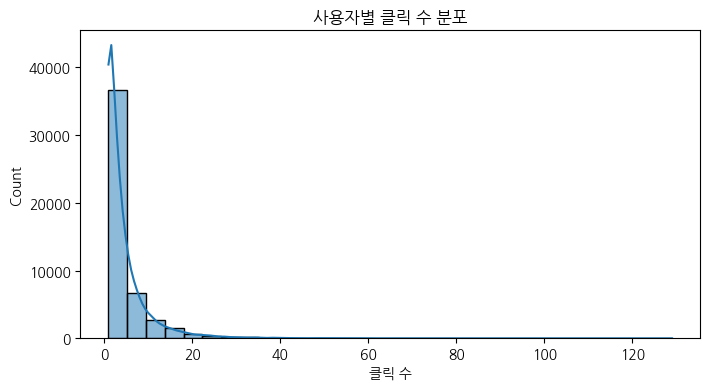

In [35]:

plt.figure(figsize=(8, 4))
sns.histplot(user_clicks, bins=30, kde=True)
plt.title("사용자별 클릭 수 분포")
plt.xlabel("클릭 수")
plt.show()


In [39]:
user_clicks.describe()

count    49108.000000
mean         4.714710
std          5.783777
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        129.000000
Name: clicked, dtype: float64

<Axes: >

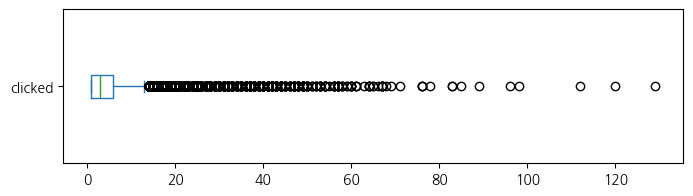

In [23]:
user_clicks.plot(kind='box', vert=False, figsize=(8, 2))    

In [24]:
user_clicks.describe()

count    49108.000000
mean         4.714710
std          5.783777
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        129.000000
Name: clicked, dtype: float64

In [25]:
# 평균 클릭 수는 5회 정도이며, 대부분의 사용자가 0~10회 사이의 클릭을 한 것을 확인

In [26]:
print("상위 클릭 사용자")
display(user_clicks.sort_values(ascending=False).head())

print("거의 클릭하지 않은 사용자")
display(user_clicks[user_clicks == 1].head())

상위 클릭 사용자


user_id
U53220    129
U70550    120
U63482    112
U20833     98
U32322     96
Name: clicked, dtype: int64

거의 클릭하지 않은 사용자


user_id
U100      1
U10008    1
U10015    1
U10026    1
U10038    1
Name: clicked, dtype: int64

### 시간대별 클릭수

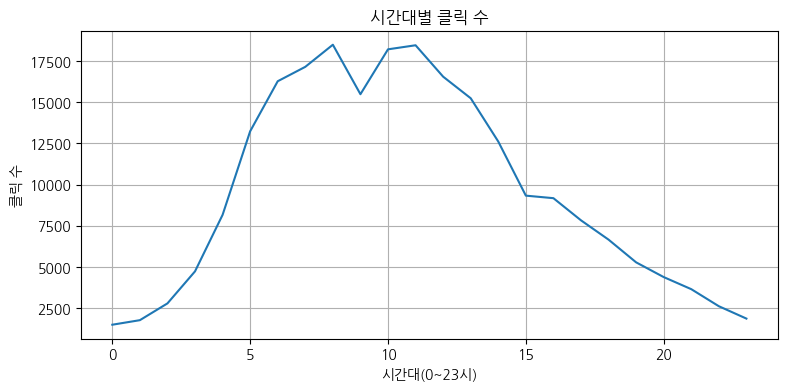

In [34]:
hourly_clicks = expanded_impressions_df.groupby('hour')['clicked'].sum()
plt.figure(figsize=(9,4
                    ))
sns.lineplot(x=hourly_clicks.index, y=hourly_clicks.values)
plt.title("시간대별 클릭 수")
plt.xlabel("시간대(0~23시)")
plt.ylabel("클릭 수")
plt.grid(True)
plt.show()

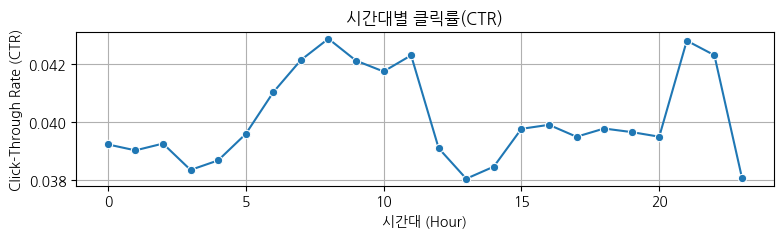

In [32]:
hourly_ctr = expanded_impressions_df.groupby("hour")["clicked"].mean().reset_index()

plt.figure(figsize=(9,2))
sns.lineplot(x=hourly_ctr["hour"], y=hourly_ctr["clicked"], marker="o")
plt.xlabel("시간대 (Hour)")
plt.ylabel("Click-Through Rate (CTR)")
plt.title("시간대별 클릭률(CTR)")
plt.grid(True)
plt.show()


In [29]:
# 아침 시간대에 클릭 수가 증가하며, 오후 시간대에 감소하는 경향을 보임  

In [31]:
news_df= pd.read_csv('./Data/news.csv')

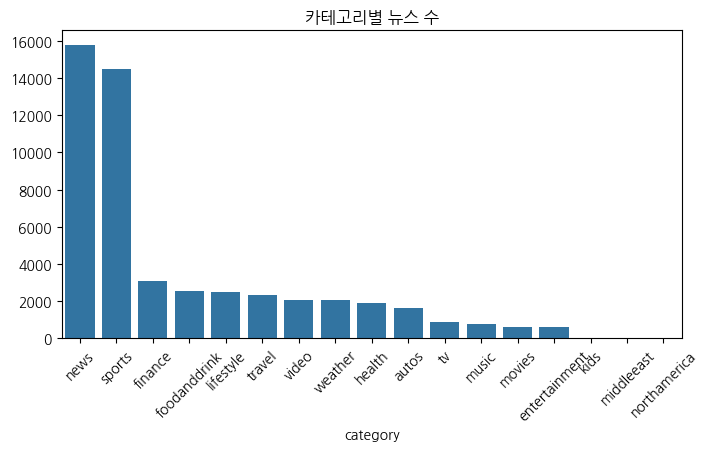

category
news             15774
sports           14510
finance           3107
foodanddrink      2551
lifestyle         2479
travel            2350
video             2068
weather           2048
health            1885
autos             1639
tv                 889
music              769
movies             606
entertainment      587
kids                17
middleeast           2
northamerica         1
Name: count, dtype: int64


In [32]:
category_counts = news_df['category'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("카테고리별 뉴스 수")
plt.xticks(rotation=45)
plt.show()

print(category_counts)


### 클릭수가 많은 뉴스

In [33]:
news_clicks = expanded_impressions_df.groupby('news_id')['clicked'].sum().sort_values(ascending=False)

top_clicked_news_ids = news_clicks.head(10).index.tolist()

# 뉴스 제목, 카테고리 함께 출력
top_clicked_news_info = news_df[news_df['news_id'].isin(top_clicked_news_ids)][['news_id', 'title', 'category']]

# 클릭 수 정보도 같이 붙이기
top_clicked_news_info = top_clicked_news_info.merge(
    news_clicks.reset_index(),
    on='news_id',
    how='left'
)

# 클릭 수 기준으로 다시 정렬 (병합하면서 순서 뒤섞일 수 있음)
top_clicked_news_info = top_clicked_news_info.sort_values(by='clicked', ascending=False)

print("클릭 많은 뉴스 TOP 10 (제목 + 카테고리)")
display(top_clicked_news_info)


클릭 많은 뉴스 TOP 10 (제목 + 카테고리)


,news_id,title,category,clicked
1,N55689,"Charles Rogers, former Michigan State football...",sports,4249
8,N35729,Porsche launches into second story of New Jers...,news,3289
3,N33619,College gymnast dies following training accide...,news,3181
6,N53585,"Rip Taylor's Cause of Death Revealed, Memorial...",tv,2782
4,N63970,Dean Foods files for bankruptcy,finance,2519
9,N49685,Broadway Star Laurel Griggs Suffered Asthma At...,music,2249
7,N49279,Broadway Actress Laurel Griggs Dies at Age 13,music,2234
0,N287,Three school workers charged in death of speci...,news,2074
2,N23446,Prince Harry and Meghan Markle just shared a n...,lifestyle,1888
5,N51048,Rep. Tim Ryan endorses Biden in Democratic pri...,news,1832


### 카테고리별 클릭 수

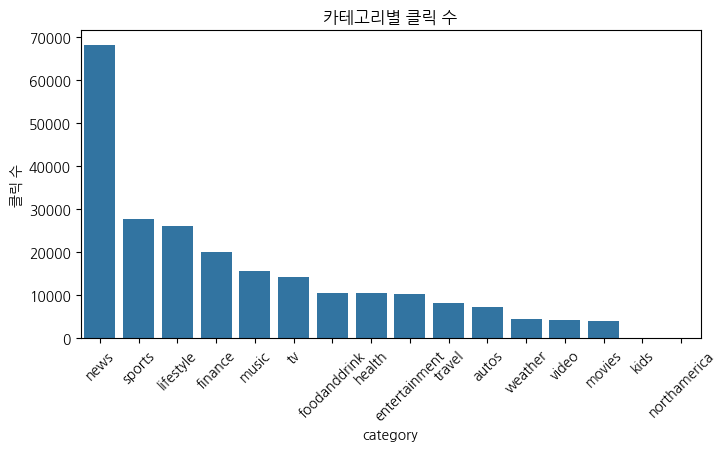

In [34]:

category_clicks = expanded_impressions_df.merge(
    news_df[['news_id', 'category']],
    on='news_id',
    how='left'
).groupby('category')['clicked'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=category_clicks.index, y=category_clicks.values)
plt.title("카테고리별 클릭 수")
plt.xticks(rotation=45)
plt.ylabel("클릭 수")
plt.show()


In [35]:
pd.DataFrame(category_clicks).reset_index()

,category,clicked
0,news,68062
1,sports,27632
2,lifestyle,26001
3,finance,20160
4,music,15650
5,tv,14293
6,foodanddrink,10643
7,health,10635
8,entertainment,10297
9,travel,8118


### 요일별 클릭수/클릭률

/var/folders/kp/qjjg7mlj0bx023qd9bw7fngm0000gn/T/ipykernel_1327/1736637931.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weekday_ctr["weekday"], y=weekday_ctr["clicked"], palette="pastel")


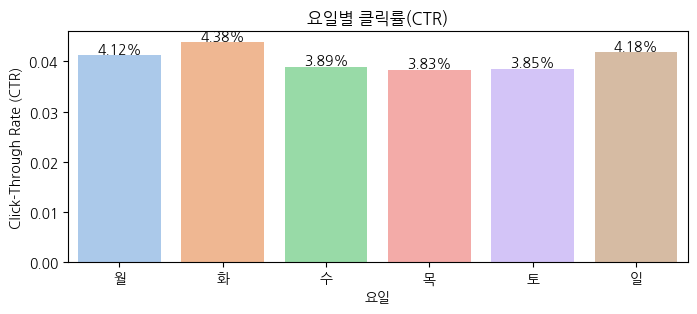

In [50]:
# 요일 변환 (0=월요일, ..., 6=일요일)
weekday_labels = ["월", "화", "수", "목", "금", "토", "일"]
weekday_ctr = expanded_impressions_df.groupby("weekday")["clicked"].mean().reset_index()
weekday_ctr["weekday"] = weekday_ctr["weekday"].map(lambda x: weekday_labels[x])

plt.figure(figsize=(8, 3))
ax = sns.barplot(x=weekday_ctr["weekday"], y=weekday_ctr["clicked"], palette="pastel")

for i, v in enumerate(weekday_ctr["clicked"]):
    ax.text(i, v + 0.0005, f"{v:.2%}", ha="center", fontsize=10)

plt.xlabel("요일")
plt.ylabel("Click-Through Rate (CTR)")
plt.title("요일별 클릭률(CTR)")
plt.show()


/var/folders/kp/qjjg7mlj0bx023qd9bw7fngm0000gn/T/ipykernel_1327/2401778230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weekday_clicks["weekday"], y=weekday_clicks["clicked"], palette="pastel")


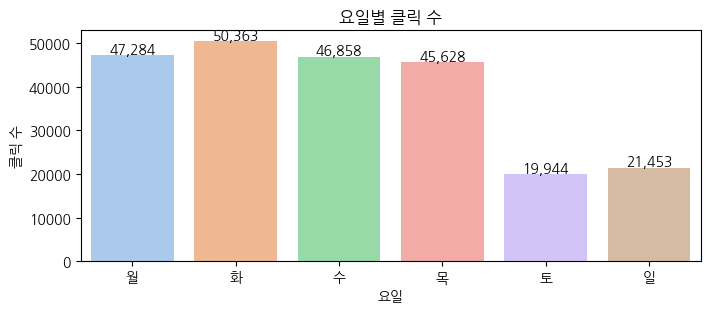

In [ ]:

weekday_clicks = expanded_impressions_df.groupby("weekday")["clicked"].sum().reset_index()
weekday_clicks["weekday"] = weekday_clicks["weekday"].map(lambda x: weekday_labels[x])

plt.figure(figsize=(8, 3))
ax = sns.barplot(x=weekday_clicks["weekday"], y=weekday_clicks["clicked"], palette="pastel")

for i, v in enumerate(weekday_clicks["clicked"]):
    ax.text(i, v + 500, f"{v:,}", ha="center", fontsize=10) 

plt.xlabel("요일")
plt.ylabel("클릭 수")
plt.title("요일별 클릭 수")
plt.show()


### 평일/주말 클릭 수

/var/folders/kp/qjjg7mlj0bx023qd9bw7fngm0000gn/T/ipykernel_1327/1321322718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['평일', '주말'], y=weekend_clicks.values, palette="pastel")


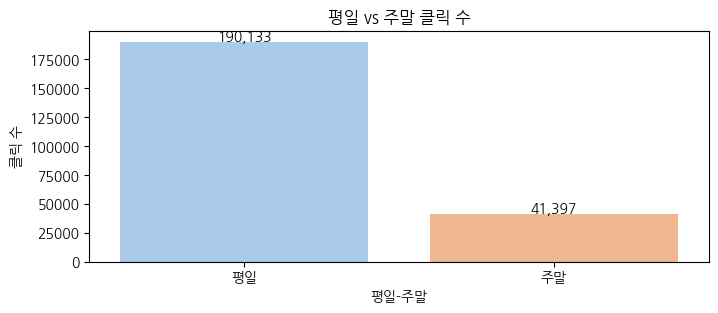

In [54]:
weekend_clicks = expanded_impressions_df.groupby('is_weekend')['clicked'].sum()

plt.figure(figsize=(8, 3))

ax = sns.barplot(x=['평일', '주말'], y=weekend_clicks.values, palette="pastel")

for i, v in enumerate(weekend_clicks.values):
    ax.text(i, v + 1000, f"{v:,}", ha="center", fontsize=10) 

plt.title("평일 vs 주말 클릭 수")
plt.xlabel("평일-주말")
plt.ylabel("클릭 수")
plt.show()


/var/folders/kp/qjjg7mlj0bx023qd9bw7fngm0000gn/T/ipykernel_1327/2721250526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="is_weekend", y="clicked", data=weekend_ctr, palette="pastel")


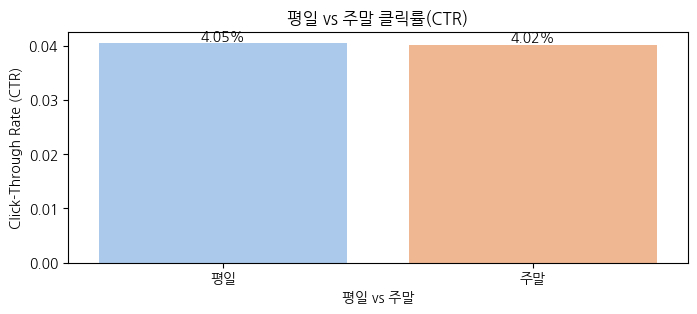

In [55]:
weekend_ctr = expanded_impressions_df.groupby("is_weekend")["clicked"].mean().reset_index()
weekend_ctr["is_weekend"] = weekend_ctr["is_weekend"].map({0: "평일", 1: "주말"})

plt.figure(figsize=(8, 3))

ax = sns.barplot(x="is_weekend", y="clicked", data=weekend_ctr, palette="pastel")

for i, v in enumerate(weekend_ctr["clicked"]):
    ax.text(i, v + 0.0005, f"{v:.2%}", ha="center", fontsize=10) 

plt.xlabel("평일 vs 주말")
plt.ylabel("Click-Through Rate (CTR)")
plt.title("평일 vs 주말 클릭률(CTR)")
plt.show()



In [ ]:
expanded_impressions_df['weekday'].value_counts()

weekday
2    1203640
3    1191854
1    1150633
0    1146764
5     517360
6     512751
Name: count, dtype: int64

In [ ]:
# 금요일이 없는 것이 특이점..

In [ ]:
expanded_impressions_df['is_weekend'].value_counts(1)

is_weekend
0    0.820005
1    0.179995
Name: proportion, dtype: float64

### CTR(클릭률)

In [49]:
behaviors_df.head()

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [48]:
impressions_df.head()

,user_id,news_id,clicked
0,U13740,N55689,1
1,U13740,N35729,0
2,U91836,N20678,0
3,U91836,N39317,0
4,U91836,N58114,0


### 뉴스별 노출 수 

In [51]:
news_impression_count = expanded_impressions_df.groupby('news_id').size()
news_impression_count

news_id
N10005      1
N10007      5
N10010     11
N10011      4
N10015      3
         ... 
N9991      14
N9994       2
N9997     326
N9998       6
N9999      12
Length: 20288, dtype: int64

### 뉴스별 클릭 수

In [52]:
news_click_count = expanded_impressions_df.groupby('news_id')['clicked'].sum()
news_click_count

news_id
N10005     0
N10007     0
N10010     0
N10011     0
N10015     0
          ..
N9991      2
N9994      0
N9997     15
N9998      0
N9999      2
Name: clicked, Length: 20288, dtype: int64

In [53]:
news_ctr = (news_click_count / news_impression_count).fillna(0)
news_ctr

news_id
N10005    0.000000
N10007    0.000000
N10010    0.000000
N10011    0.000000
N10015    0.000000
            ...   
N9991     0.142857
N9994     0.000000
N9997     0.046012
N9998     0.000000
N9999     0.166667
Length: 20288, dtype: float64

In [54]:
ctr = expanded_impressions_df['clicked'].mean()
print(f"전체 클릭률(CTR): {ctr:.4f}")


전체 클릭률(CTR): 0.0404


In [ ]:
news_impression_count = expanded_impressions_df.groupby('news_id').size()
news_click_count = expanded_impressions_df.groupby('news_id')['clicked'].sum()

news_ctr = (news_click_count / news_impression_count).fillna(0).sort_values(ascending=False)

# 상위 10개 뉴스 ID 가져오기
top_ctr_news_ids = news_ctr.head(10).index.tolist()

# 뉴스 제목 + CTR + 노출 수 함께 출력
top_ctr_news_info = news_df[news_df['news_id'].isin(top_ctr_news_ids)][['news_id', 'title', 'category']]

# CTR 및 노출 수 붙이기
top_ctr_news_info = top_ctr_news_info.merge(
    news_ctr.reset_index().rename(columns={0: 'ctr'}),
    on='news_id',
    how='left'
).merge(
    news_impression_count.reset_index().rename(columns={0: 'impression_count'}),
    on='news_id',
    how='left'
)

top_ctr_news_info = top_ctr_news_info.sort_values(by='ctr', ascending=False)

print("CTR 높은 뉴스 TOP 10 (제목 + CTR + 노출 수)")
display(top_ctr_news_info)


CTR 높은 뉴스 TOP 10 (제목 + CTR + 노출 수)


,news_id,title,category,ctr,impression_count
0,N51567,Ex-Arsenal star Henry to coach Montreal Impact,sports,1.0,1
1,N39309,Margaret Court calls for grand slam anniversar...,sports,1.0,1
2,N59659,Friday's Scores,news,1.0,1
3,N59490,"Stretchy, Degradable Semiconductors Are the Fu...",news,1.0,1
4,N59558,"Buffaloes vs. Cardinal: Start time, TV coverag...",sports,1.0,1
5,N51623,Boy Undergoes Double Lung Transplant In Detroi...,health,1.0,1
6,N39123,Split Supreme Court appears ready to allow Tru...,news,1.0,1
7,N16702,Elton John's Farewell Yellow Brick Road Tour r...,music,1.0,1
8,N24888,Union County deputies kill 81-year-old man who...,news,1.0,1
9,N62029,"Hart Island, Final Resting Place Of 1 Million,...",news,1.0,1


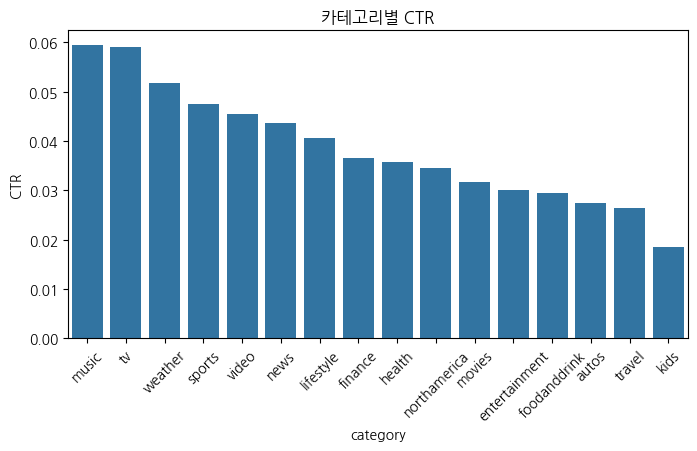

category
music            0.059433
tv               0.059011
weather          0.051689
sports           0.047585
video            0.045464
news             0.043624
lifestyle        0.040559
finance          0.036476
health           0.035723
northamerica     0.034483
movies           0.031690
entertainment    0.030092
foodanddrink     0.029463
autos            0.027367
travel           0.026353
kids             0.018519
Name: clicked, dtype: float64


In [57]:
category_ctr = expanded_impressions_df.merge(
    news_df[['news_id', 'category']],
    on='news_id',
    how='left'
).groupby('category')['clicked'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=category_ctr.index, y=category_ctr.values)
plt.title("카테고리별 CTR")
plt.xticks(rotation=45)
plt.ylabel("CTR")
plt.show()

print(category_ctr)


In [58]:
history_list = []

for _, row in behaviors_df.iterrows():
    user_id = row['user_id']
    if pd.notnull(row['history']):
        history_news_ids = row['history'].split()
        for news_id in history_news_ids:
            history_list.append([user_id, news_id])

history_df = pd.DataFrame(history_list, columns=['user_id', 'history_news_id'])

print(f"히스토리 테이블 크기: {history_df.shape}")
display(history_df.head())


히스토리 테이블 크기: (5107639, 2)


,user_id,history_news_id
0,U13740,N55189
1,U13740,N42782
2,U13740,N34694
3,U13740,N45794
4,U13740,N18445


In [59]:
history_df.shape

(5107639, 2)

In [60]:
user_history_length = history_df.groupby('user_id').size()
print(user_history_length.describe())


count    49108.000000
mean       104.008288
std        349.703277
min          1.000000
25%          8.000000
50%         20.000000
75%         70.000000
max      18972.000000
dtype: float64


In [61]:
top_history_news = history_df['history_news_id'].value_counts().head(10)
top_history_news_titles = news_df[news_df['news_id'].isin(top_history_news.index)][['news_id', 'title', 'category']]

top_history_news_titles = top_history_news_titles.merge(
    top_history_news.rename('count'),
    left_on='news_id',
    right_index=True,
    how='left'
).sort_values(by='count', ascending=False)

print("히스토리에 자주 등장한 뉴스 TOP 10")
display(top_history_news_titles)


히스토리에 자주 등장한 뉴스 TOP 10


,news_id,title,category,count
11465,N306,Kevin Spacey Won't Be Charged in Sexual Assaul...,movies,20765
14216,N42620,Heidi Klum's 2019 Halloween Costume Transforma...,lifestyle,17918
2077,N31801,Joe Biden reportedly denied Communion at a Sou...,news,15694
22967,N47020,The News In Cartoons,news,15216
21466,N45794,Four flight attendants were arrested in Miami'...,news,15200
16666,N43142,Former NBA first-round pick Jim Farmer arreste...,sports,14565
28505,N871,"Woman, suspect dead at 'Tarzan' actor Ron Ely'...",tv,14210
6892,N55189,"'Wheel Of Fortune' Guest Delivers Hilarious, O...",tv,13394
11870,N29177,"Miguel Cervantes' Wife Reveals Daughter, 3, 'D...",tv,13243
30142,N16715,Mitch McConnell snubbed by Elijah Cummings' pa...,news,13011
